In [1]:
# # Task 1: EDA for Financial Complaints
# ## Clean, Professional Notebook

# %% Cell 1: Imports & Setup
import sys, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sys.path.append('..')
from src.config import RAW_DATA_PATH
from src.data_loader import load_complaints_data
plt.style.use('seaborn-v0_8-darkgrid'); sns.set_palette("husl")

print("✅ Setup complete")


✅ Setup complete


In [2]:
# %% Cell 2: Load Data (Sample for Speed)
df = load_complaints_data(RAW_DATA_PATH, sample_size=100000)
print(f"✅ Loaded {len(df):,} complaints")

📊 Loading sample of 100,000 records...
✅ Loaded sample: 100,000 records


✅ Loaded 100,000 complaints


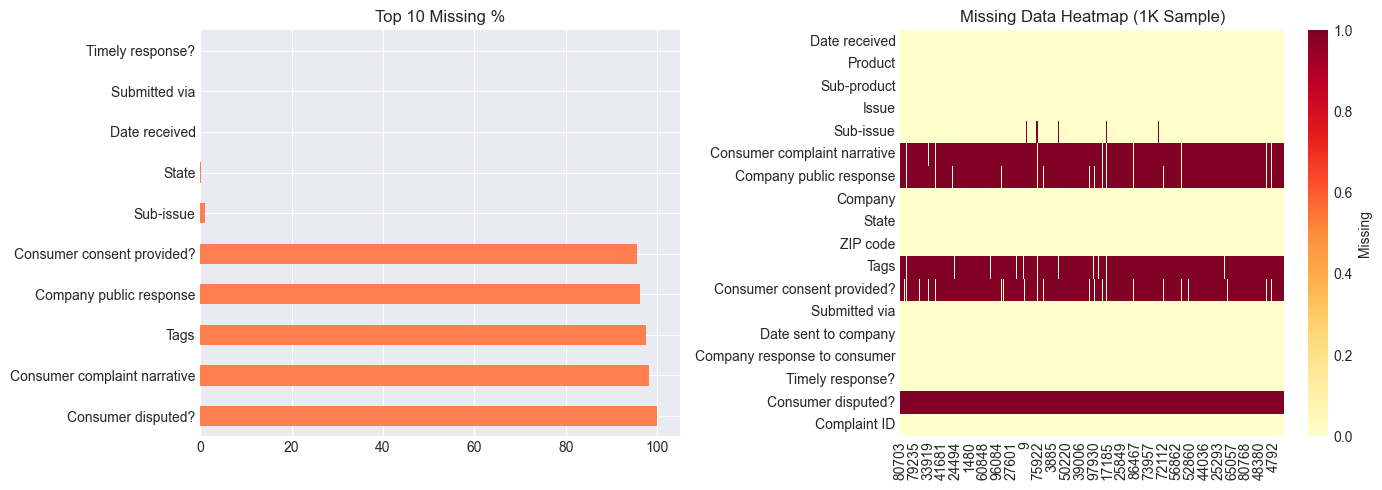

In [3]:
# %% Cell 3: Missing Data Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
missing = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False).head(10)
missing.plot(kind='barh', ax=axes[0], color='coral'); axes[0].set_title('Top 10 Missing %')
sns.heatmap(df.sample(1000).isnull().T, cmap='YlOrRd', ax=axes[1], cbar_kws={'label': 'Missing'})
axes[1].set_title('Missing Data Heatmap (1K Sample)')
plt.tight_layout(); plt.savefig('../visualizations/missing_data.png'); plt.show()


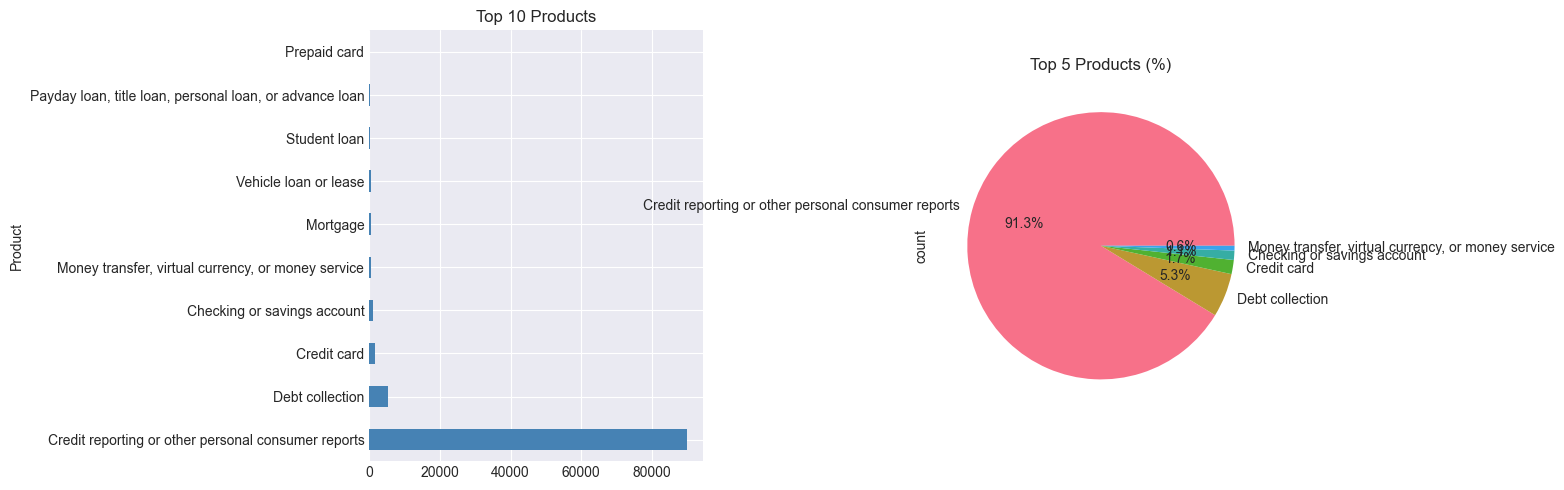

In [4]:
# %% Cell 4: Product Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df['Product'].value_counts().head(10).plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Top 10 Products')
df['Product'].value_counts().head(5).plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Top 5 Products (%)')
plt.tight_layout(); plt.savefig('../visualizations/product_dist.png'); plt.show()

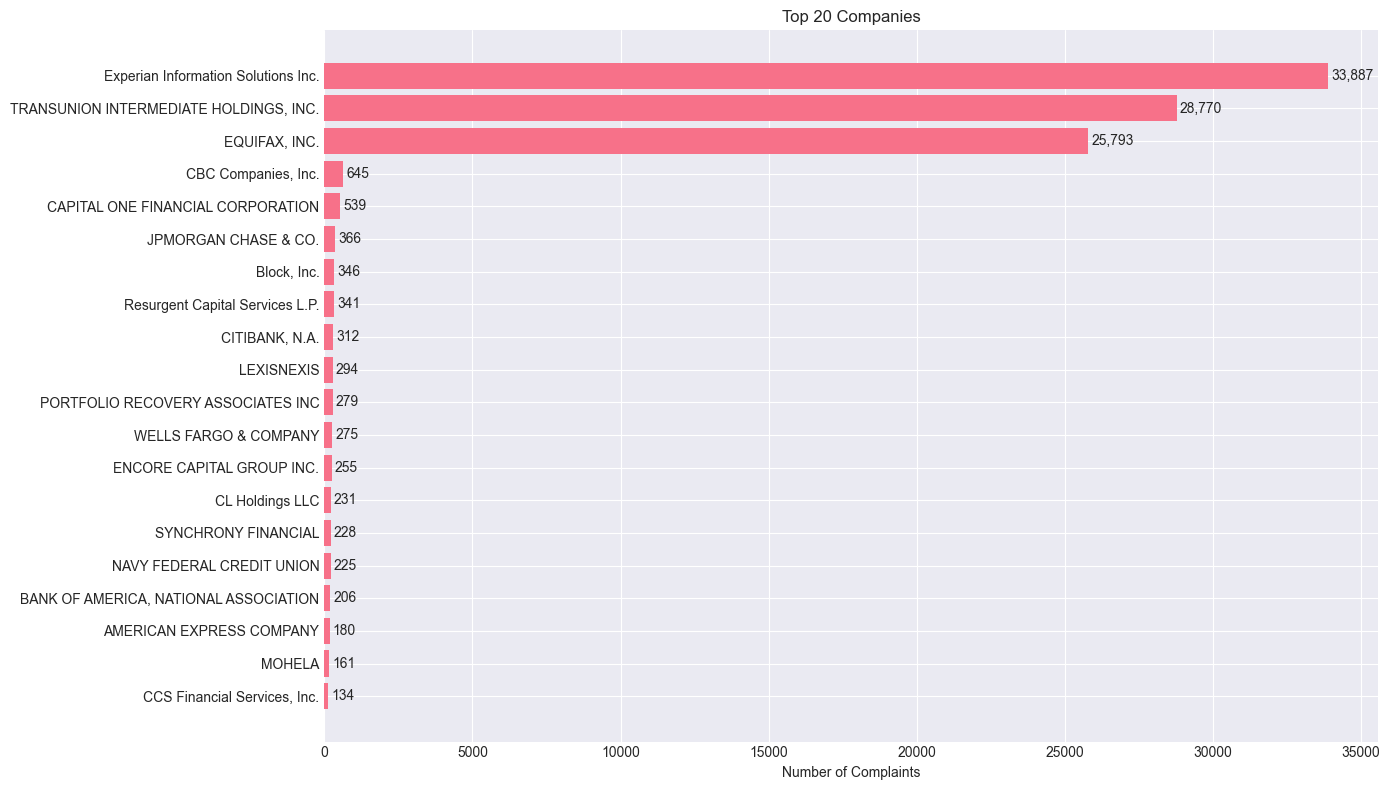

In [5]:
# %% Cell 5: Company Distribution (Top 20)
plt.figure(figsize=(14, 8))
top_companies = df['Company'].value_counts().head(20).sort_values()
bars = plt.barh(range(len(top_companies)), top_companies.values)
plt.yticks(range(len(top_companies)), top_companies.index)
plt.xlabel('Number of Complaints'); plt.title('Top 20 Companies')
for i, bar in enumerate(bars):
    plt.text(bar.get_width()+100, bar.get_y()+bar.get_height()/2, f'{int(bar.get_width()):,}', va='center')
plt.tight_layout(); plt.savefig('../visualizations/top_companies.png'); plt.show()


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


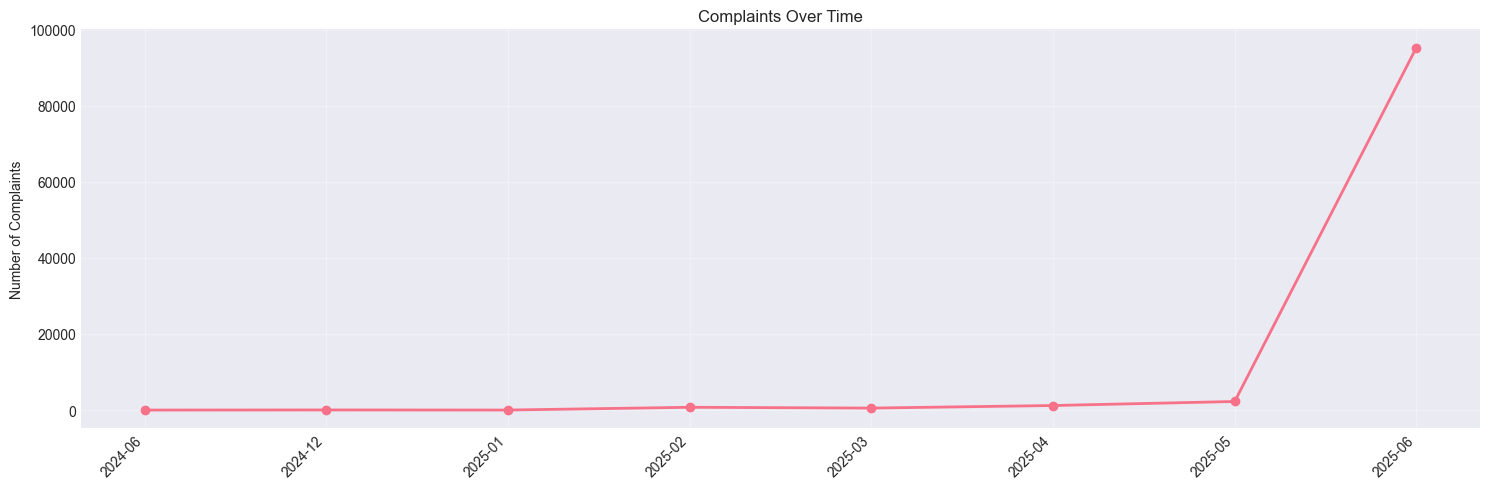

In [6]:
# %% Cell 6: Timeline Analysis
if 'Date received' in df.columns:
    df['Date'] = pd.to_datetime(pd.to_numeric(df['Date received'], errors='coerce')/1e9, unit='s')
    df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
    timeline = df['YearMonth'].value_counts().sort_index()
    plt.figure(figsize=(15, 5))
    plt.plot(timeline.index, timeline.values, marker='o', linewidth=2)
    plt.xticks(rotation=45, ha='right'); plt.grid(True, alpha=0.3)
    plt.title('Complaints Over Time'); plt.ylabel('Number of Complaints')
    plt.tight_layout(); plt.savefig('../visualizations/timeline.png'); plt.show()

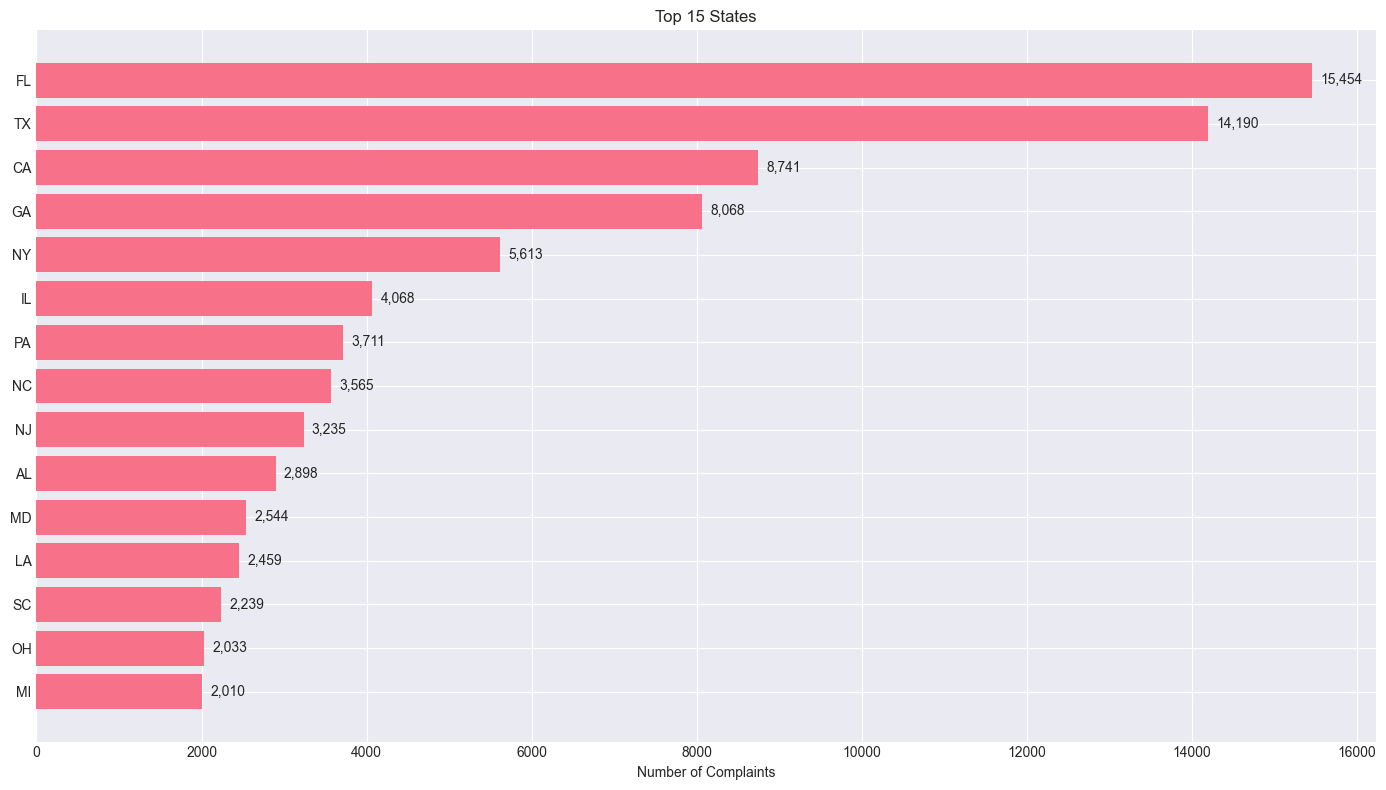

In [7]:
# %% Cell 7: State Distribution (Top 15)
plt.figure(figsize=(14, 8))
top_states = df['State'].value_counts().head(15).sort_values()
bars = plt.barh(range(len(top_states)), top_states.values)
plt.yticks(range(len(top_states)), top_states.index)
plt.xlabel('Number of Complaints'); plt.title('Top 15 States')
for i, bar in enumerate(bars):
    plt.text(bar.get_width()+100, bar.get_y()+bar.get_height()/2, f'{int(bar.get_width()):,}', va='center')
plt.tight_layout(); plt.savefig('../visualizations/top_states.png'); plt.show()


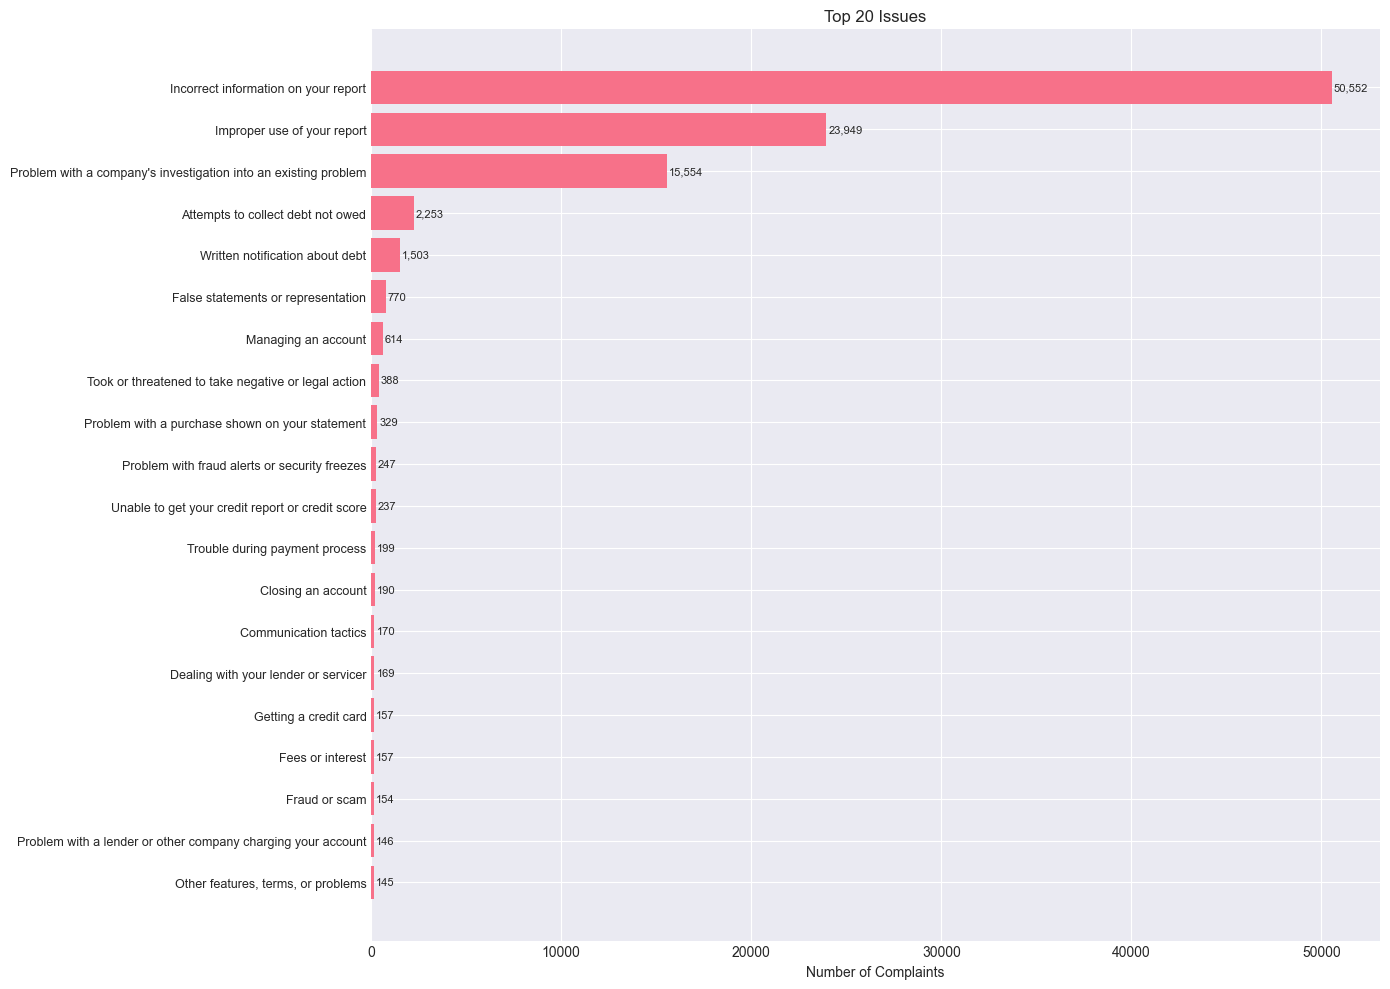

In [8]:
# %% Cell 8: Issue Distribution (Top 20)
plt.figure(figsize=(14, 10))
top_issues = df['Issue'].value_counts().head(20).sort_values()
bars = plt.barh(range(len(top_issues)), top_issues.values)
plt.yticks(range(len(top_issues)), top_issues.index, fontsize=9)
plt.xlabel('Number of Complaints'); plt.title('Top 20 Issues')
for i, bar in enumerate(bars):
    plt.text(bar.get_width()+100, bar.get_y()+bar.get_height()/2, f'{int(bar.get_width()):,}', va='center', fontsize=8)
plt.tight_layout(); plt.savefig('../visualizations/top_issues.png'); plt.show()

✅ NLP-viable complaints: 1,814 (1.8%)


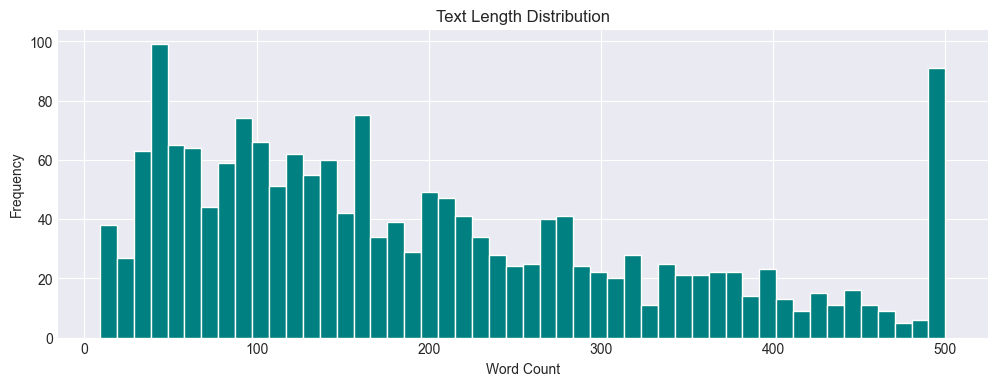

In [9]:
# %% Cell 9: Text Analysis (NLP-Viable)
viable_df = df[df['Consumer complaint narrative'].notna()].copy()
viable_df['Text_Length'] = viable_df['Consumer complaint narrative'].str.split().str.len()
print(f"✅ NLP-viable complaints: {len(viable_df):,} ({len(viable_df)/len(df)*100:.1f}%)")
plt.figure(figsize=(12, 4))
plt.hist(viable_df['Text_Length'].clip(0, 500), bins=50, color='teal', edgecolor='white')
plt.xlabel('Word Count'); plt.ylabel('Frequency'); plt.title('Text Length Distribution')
plt.savefig('../visualizations/text_length.png'); plt.show()

   Credit reporting or other personal consumer reports: took 1003/6635 samples (1003 available)
   Debt collection: took 239/1581 samples (239 available)
   Credit card: took 191/1263 samples (191 available)
   Checking or savings account: took 166/1098 samples (166 available)
   Mortgage: took 69/456 samples (69 available)
   Vehicle loan or lease: took 47/310 samples (47 available)
   Money transfer, virtual currency, or money service: took 39/257 samples (39 available)
   Payday loan, title loan, personal loan, or advance loan: took 24/158 samples (24 available)



✅ Created stratified sample with 1,778 records


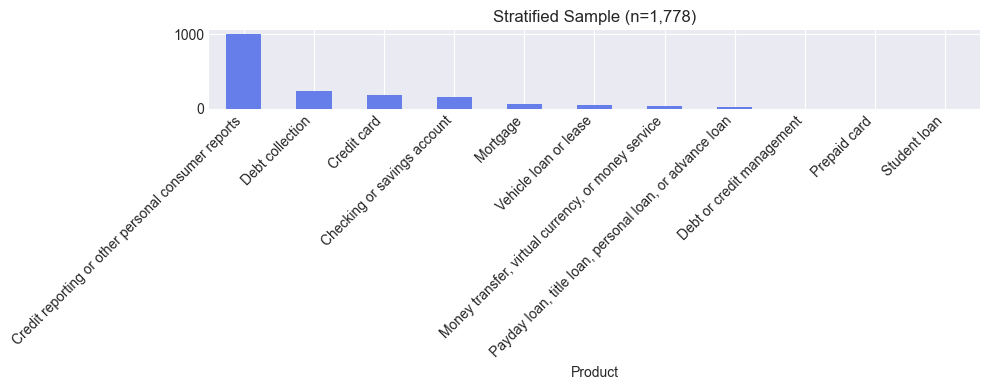

✅ Saved to ../data/stratified/sample_12000.csv


In [11]:
# %% Cell 10: Stratified Sample
sample_size = 12000
product_props = viable_df['Product'].value_counts(normalize=True)
samples = []

for p, prop in product_props.head(8).items():
    n_desired = int(prop * sample_size)
    n_available = len(viable_df[viable_df['Product'] == p])
    
    # Take minimum of desired and available
    n_to_take = min(n_desired, n_available)
    
    if n_to_take > 0:
        sample_chunk = viable_df[viable_df['Product'] == p].sample(n=n_to_take, random_state=42)
        samples.append(sample_chunk)
        print(f"   {p}: took {n_to_take}/{n_desired} samples ({n_available} available)")

sample = pd.concat(samples, ignore_index=True)
print(f"\n✅ Created stratified sample with {len(sample):,} records")

plt.figure(figsize=(10, 4))
sample['Product'].value_counts().plot(kind='bar', color='#667eea')
plt.title(f'Stratified Sample (n={len(sample):,})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visualizations/stratified_sample.png')
plt.show()

# Save sample
import os
os.makedirs('../data/stratified/', exist_ok=True)
sample.to_csv('../data/stratified/sample_12000.csv', index=False)
print(f"✅ Saved to ../data/stratified/sample_12000.csv")

In [13]:
# %% Cell 11: Save Final Dataset
final_df = viable_df[['Complaint ID', 'Date received', 'Product', 'Issue', 'Company', 
                      'State', 'Consumer complaint narrative']].copy()
final_df['Text_Length'] = final_df['Consumer complaint narrative'].str.split().str.len()
final_df.to_csv('../data/processed/filtered_complaints.csv', index=False)
print(f"✅ Saved {len(final_df):,} complaints with narratives")

# %% Cell 12: Final Summary
print("="*80)
print("🏆 TASK 1 COMPLETE - EDA SUMMARY")
print("="*80)
print(f"""
📊 METRICS: Total: {len(df):,} | With narratives: {len(viable_df):,} | Sample: {len(sample):,}
📈 9 visualizations created in visualizations/
💾 Output: filtered_complaints.csv, sample_12000.csv
🎯 Ready for Task 2: Text chunking & analysis!
""")

✅ Saved 1,814 complaints with narratives
🏆 TASK 1 COMPLETE - EDA SUMMARY

📊 METRICS: Total: 100,000 | With narratives: 1,814 | Sample: 1,778
📈 9 visualizations created in visualizations/
💾 Output: filtered_complaints.csv, sample_12000.csv
🎯 Ready for Task 2: Text chunking & analysis!

